In [75]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from functions.read_g4bl_data import readDetData
from functions.set_plot_settings import setPlotSettings

setPlotSettings(font=True)

# Location of G4bl output:
dir = 'g4bl-output/'

# Define RF period:
f = 325*10**6 # MHz
T = 1/f*10**9 # ns

# Number of detectors:
ndet = 31

In [76]:
# Choose to cut on p_total:
cuts = False

# Define cuts (MeV/c):
low_p_cut = 0
high_p_cut = 400

In [77]:
# Load data:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []
for i in range(ndet):
    data = readDetData(dir+'out'+str(i+1)+'.txt', cuts=cuts, low_p_cut=low_p_cut, high_p_cut=high_p_cut)
    x_vals.append(data['x'].values); y_vals.append(data['y'].values); z_vals.append(data['z'].values) # mm
    px_vals.append(data['px'].values); py_vals.append(data['py'].values); pz_vals.append(data['pz'].values) # MeV/c
    ptotal_vals.append(data['ptotal'].values) # Mev/c
    t_vals.append(data['t'].values) # ns
    del data

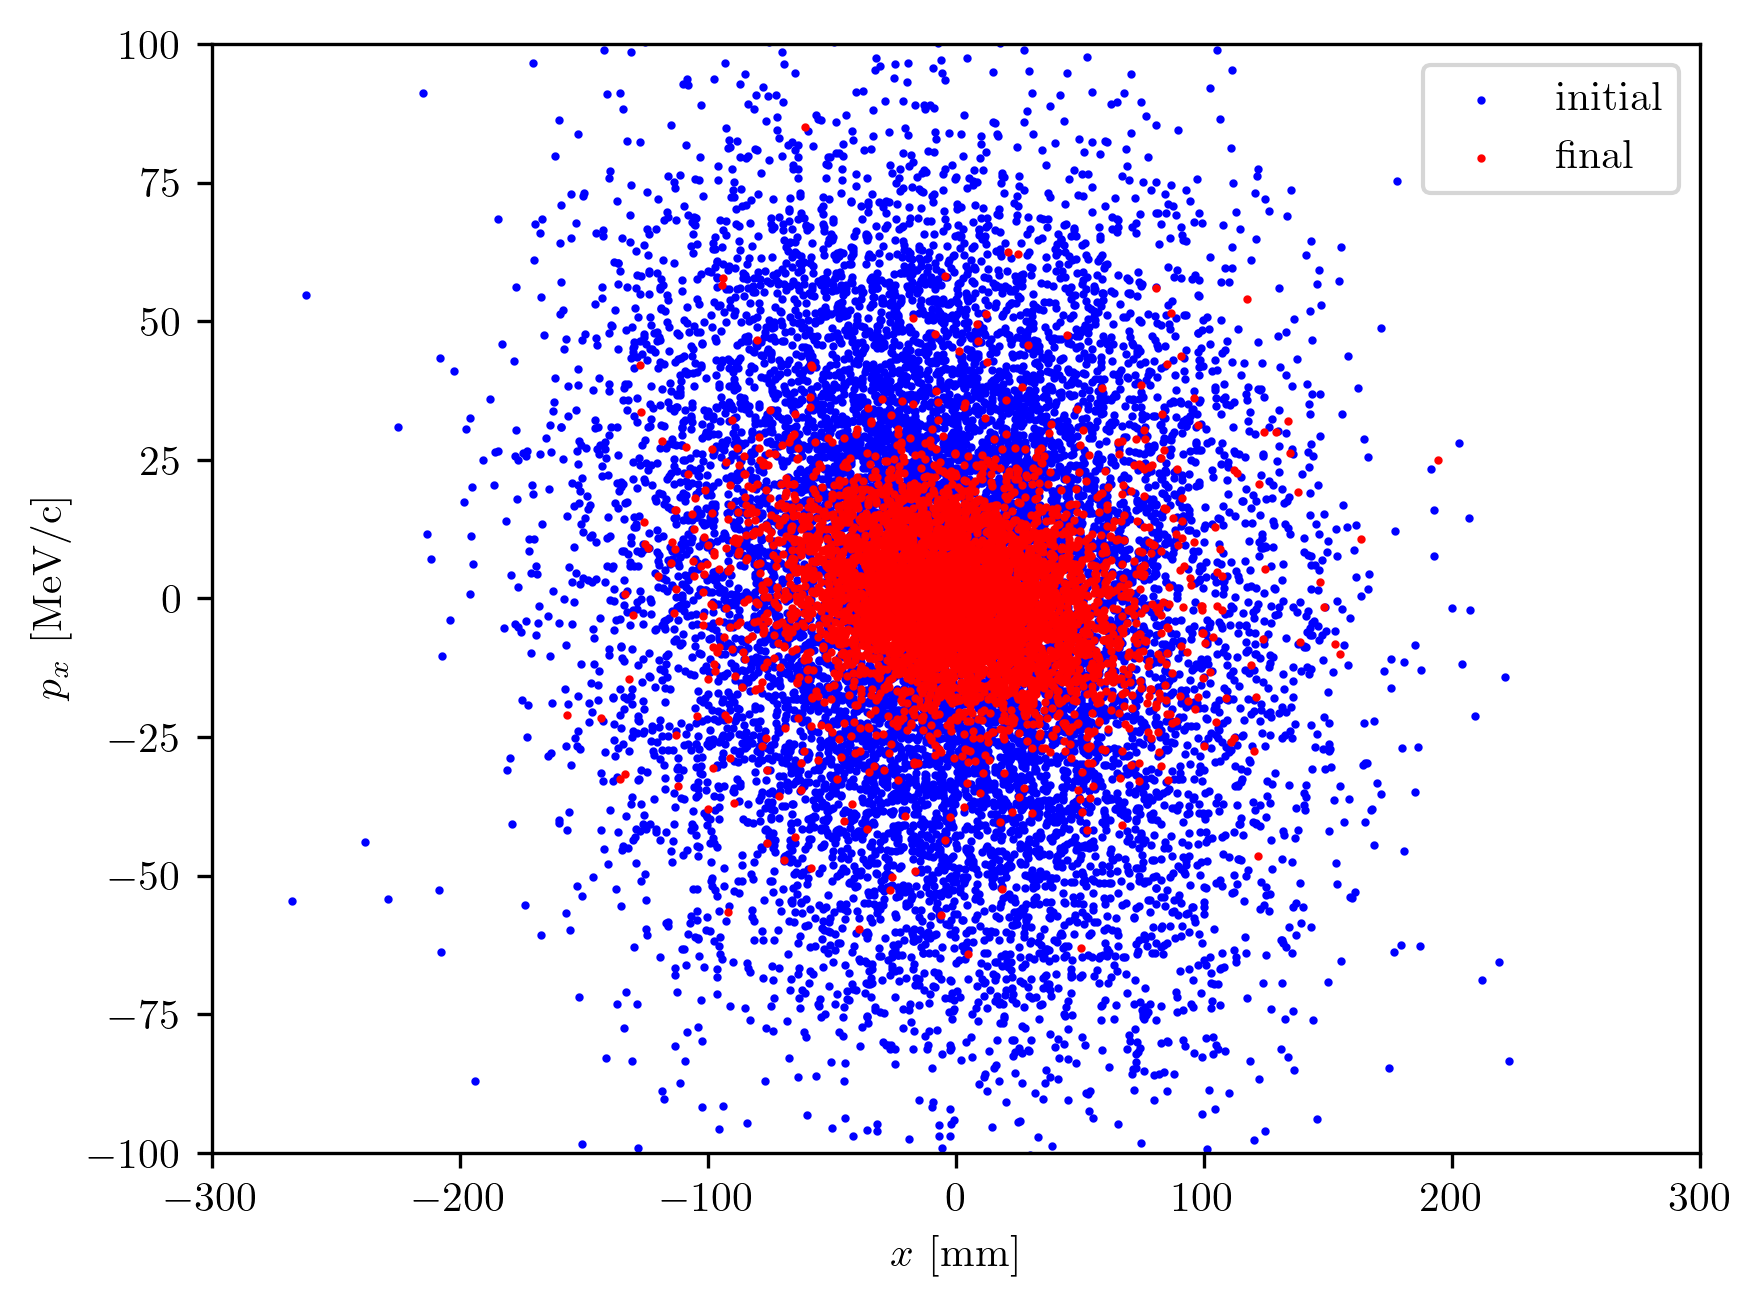

In [78]:
# Plot p_x vs. x:
plt.scatter(x_vals[0],px_vals[0],color='blue',label='initial',s=1)
plt.scatter(x_vals[ndet-1],px_vals[ndet-1],color='red',label='final',s=1)
plt.xlim(-300,300)
plt.ylim(-100,100)
plt.xlabel('$x$ [mm]')
plt.ylabel('$p_x$ [MeV/c]')
plt.legend()
plt.show()

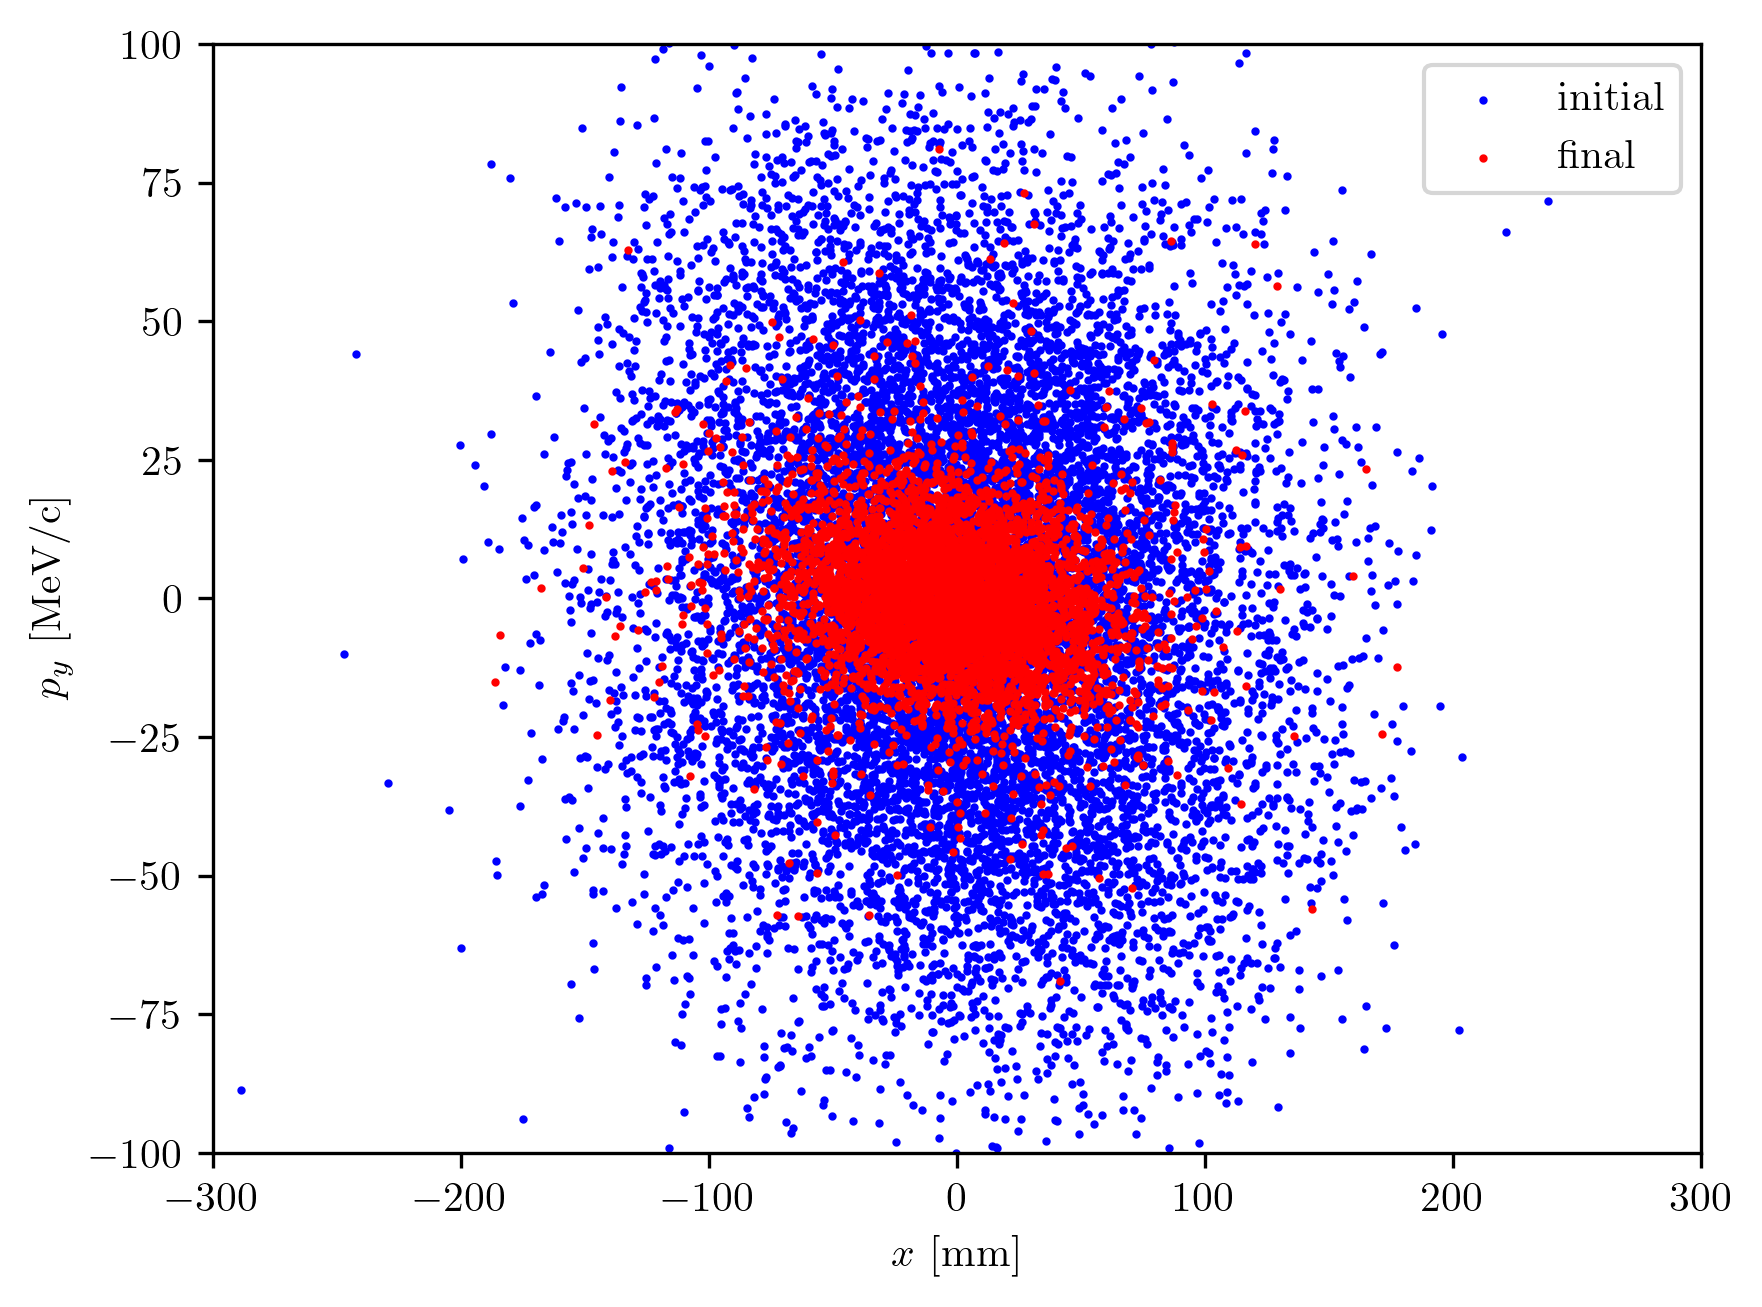

In [79]:
# Plot p_y vs. y:
plt.scatter(y_vals[0],py_vals[0],color='blue',label='initial',s=1)
plt.scatter(y_vals[ndet-1],py_vals[ndet-1],color='red',label='final',s=1)
plt.xlim(-300,300)
plt.ylim(-100,100)
plt.xlabel('$x$ [mm]')
plt.ylabel('$p_y$ [MeV/c]')
plt.legend()
plt.show()

In [80]:
# Compute mod(t,T):
def modtT(t):
    mod = []
    for i in range(len(t)):
        mod.append(t[i] % T)
    return mod
mod_initial = modtT(t_vals[0])
mod_final = modtT(t_vals[ndet-1])

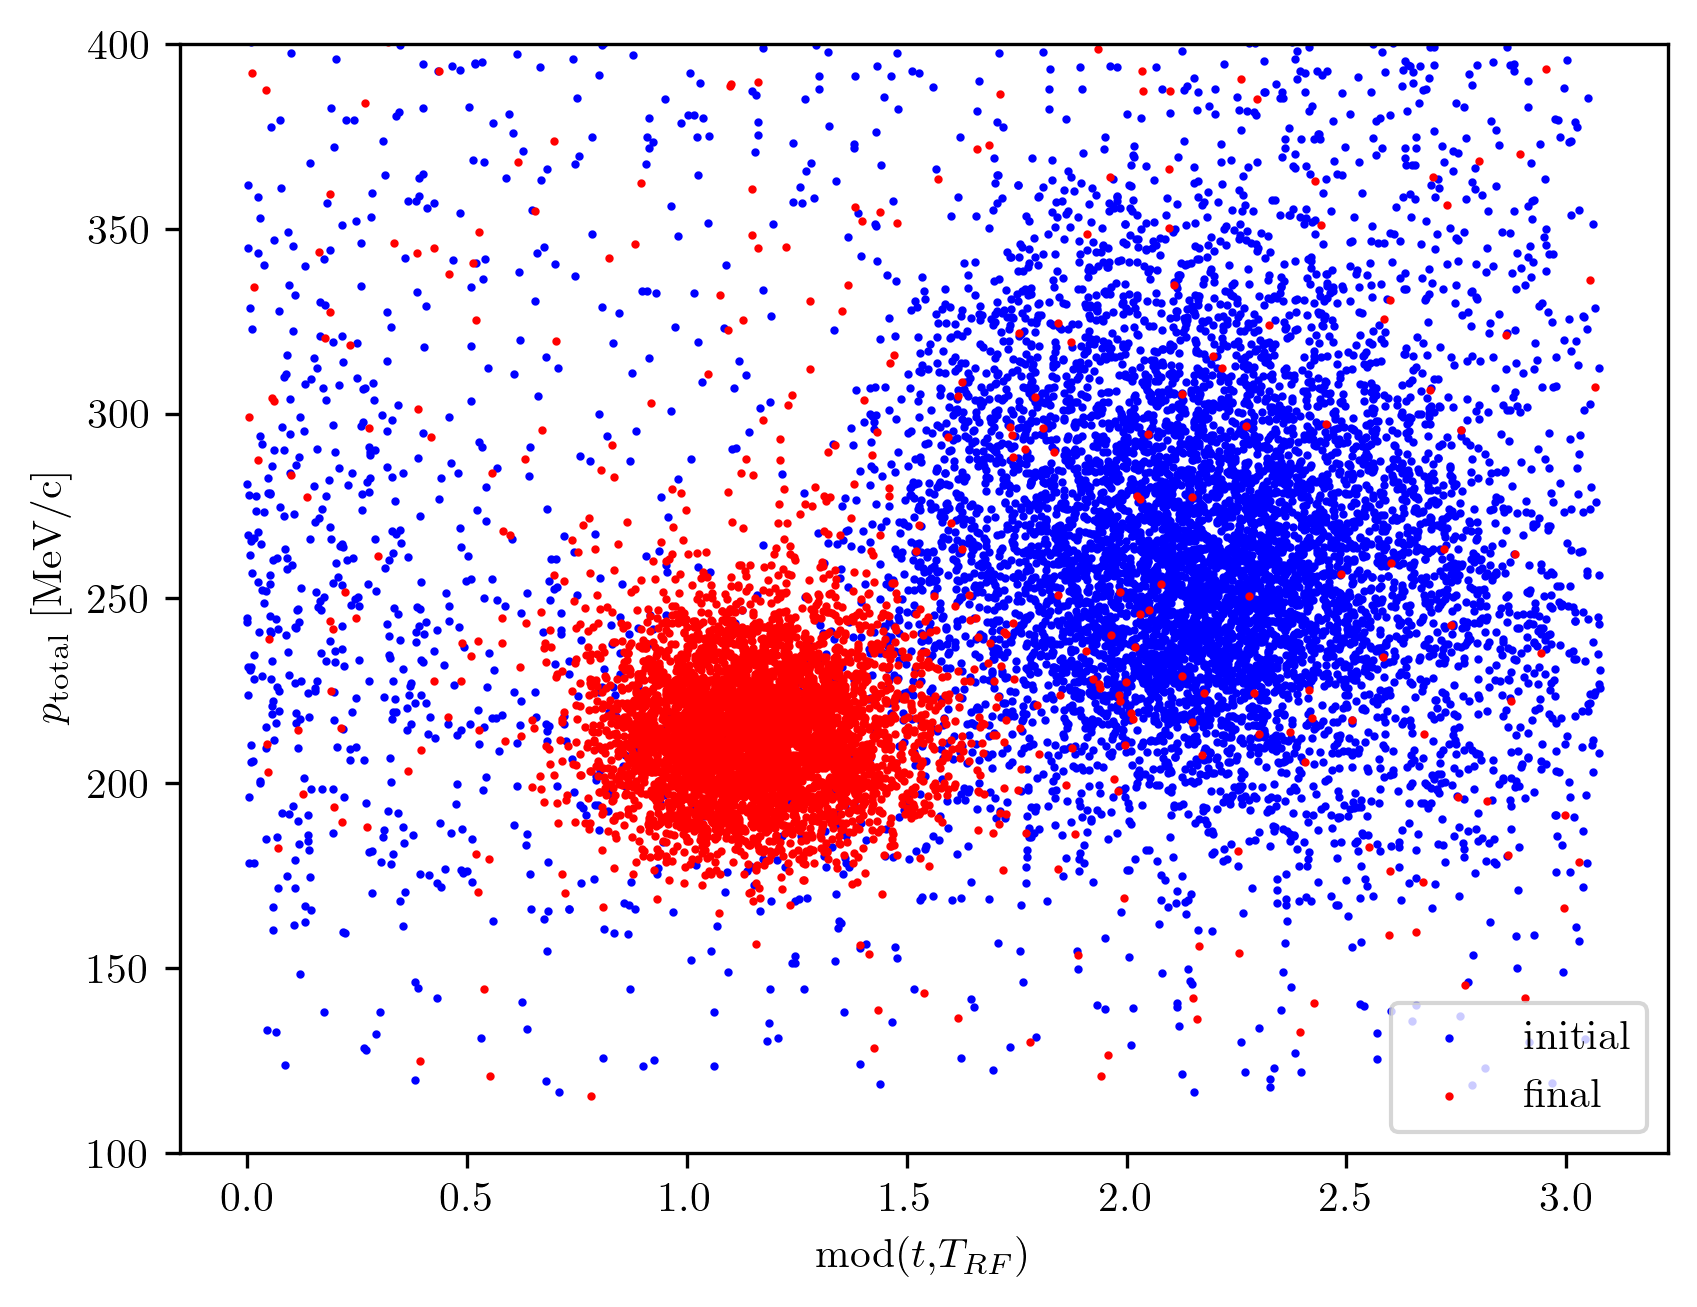

In [81]:
# Plot p_total vs. mod(t,T):
plt.scatter(mod_initial,ptotal_vals[0],color='blue',label='initial',s=1)
plt.scatter(mod_final,ptotal_vals[ndet-1],color='red',label='final',s=1)
plt.ylim(100,400)
plt.xlabel('mod($t$,$T_{RF}$)')
plt.ylabel(r'$p_{\text{total}}$ [MeV/c]')
plt.legend()
plt.show()

In [82]:
# Find mean position of p_total vs. mod(t,T) distributions:
mean_initial = np.mean(mod_initial)
mean_final = np.mean(mod_final)
print('Mean position of initial distribution: '+str(mean_initial))
print('Mean position of final distribution: '+str(mean_final))

Mean position of initial distribution: 1.849054470682873
Mean position of final distribution: 1.1802624214446487


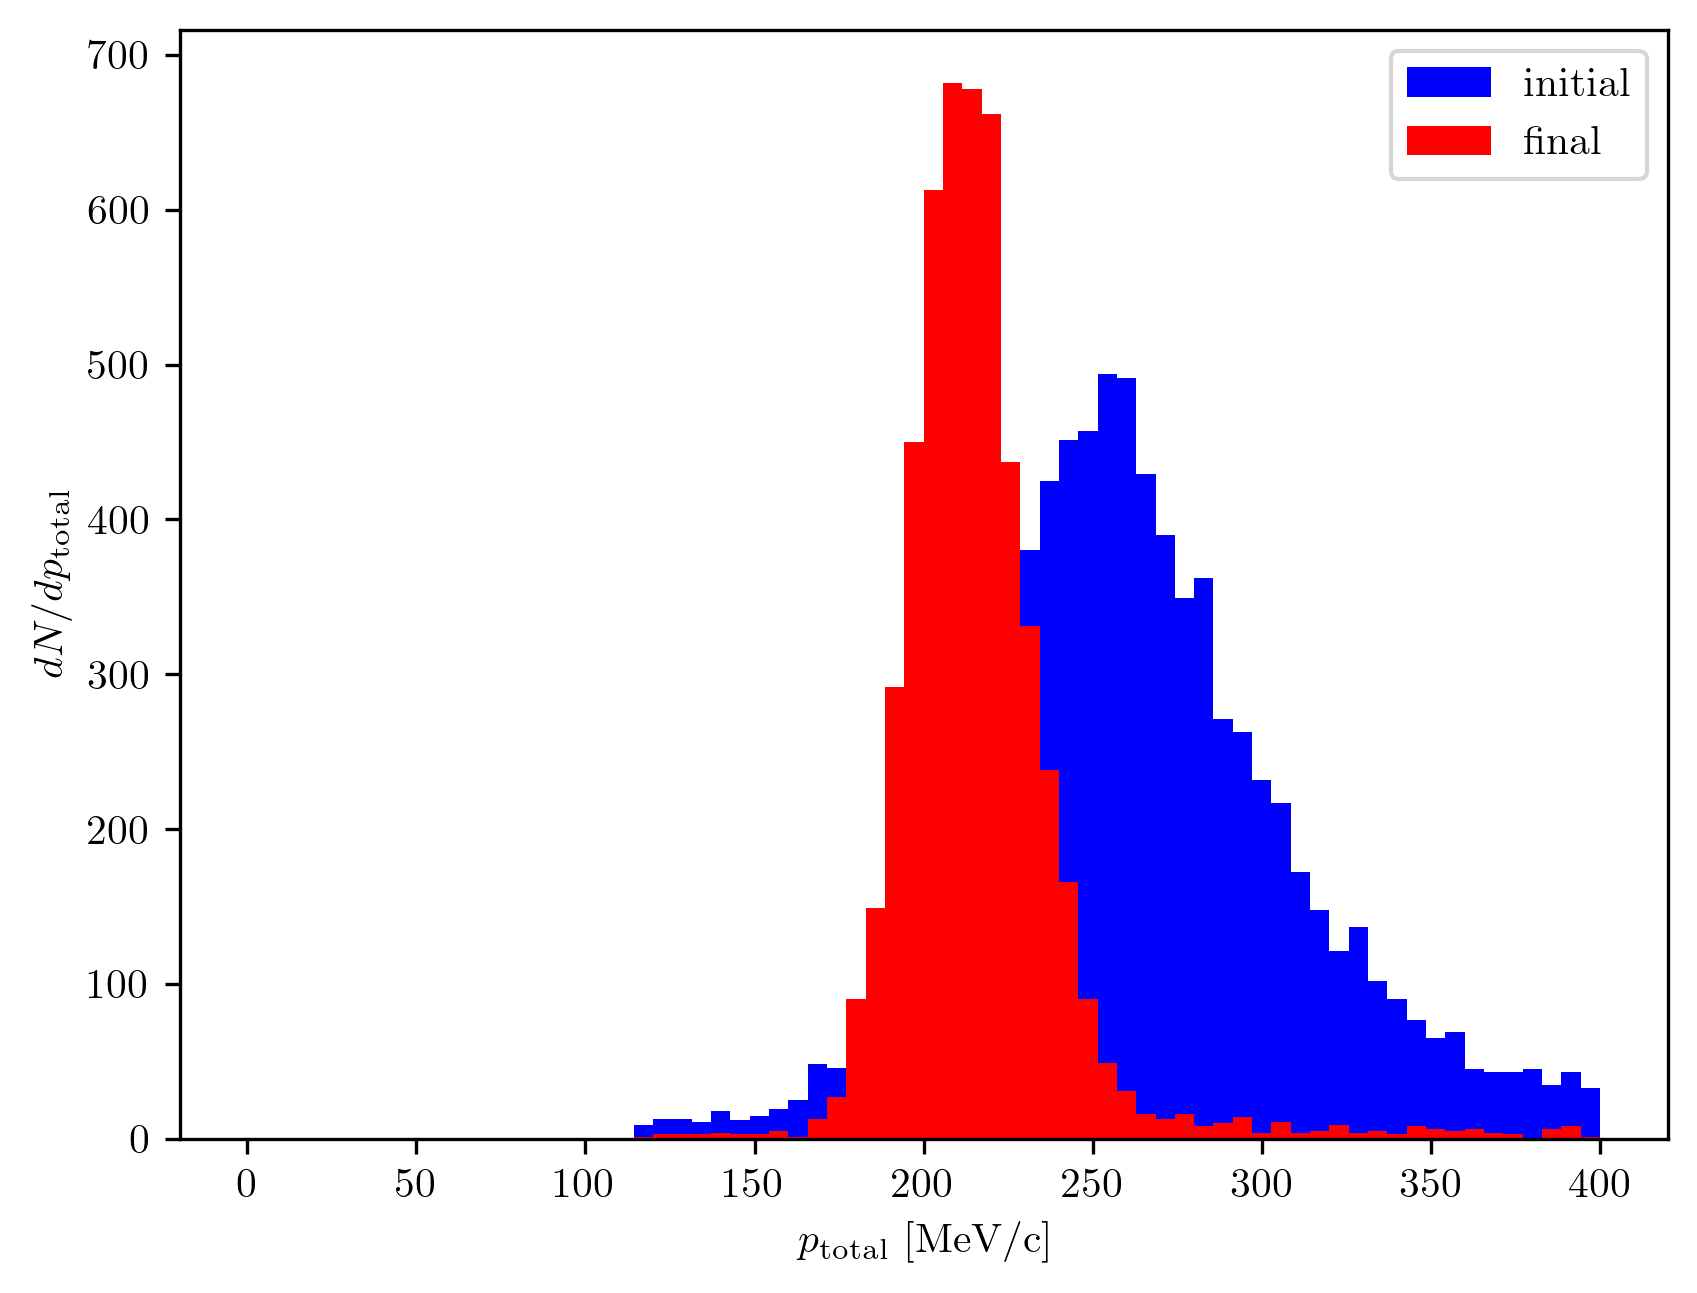

In [83]:
# Plot total p distribution:
plt.hist(ptotal_vals[0],color='blue',label='initial',bins=70,range=[0,400])
plt.hist(ptotal_vals[ndet-1],color='red',label='final',bins=70,range=[0,400])
plt.xlabel(r'$p_{\text{total}}$ [MeV/c]')
plt.ylabel(r'$dN/dp_{\text{total}}$')
plt.legend()
plt.show()

In [84]:
# Compute beam loss down channel:
loss = len(z_vals[ndet-1])/len(z_vals[0])
print('Transmission rate: '+str(loss))

Transmission rate: 0.4440478167026399


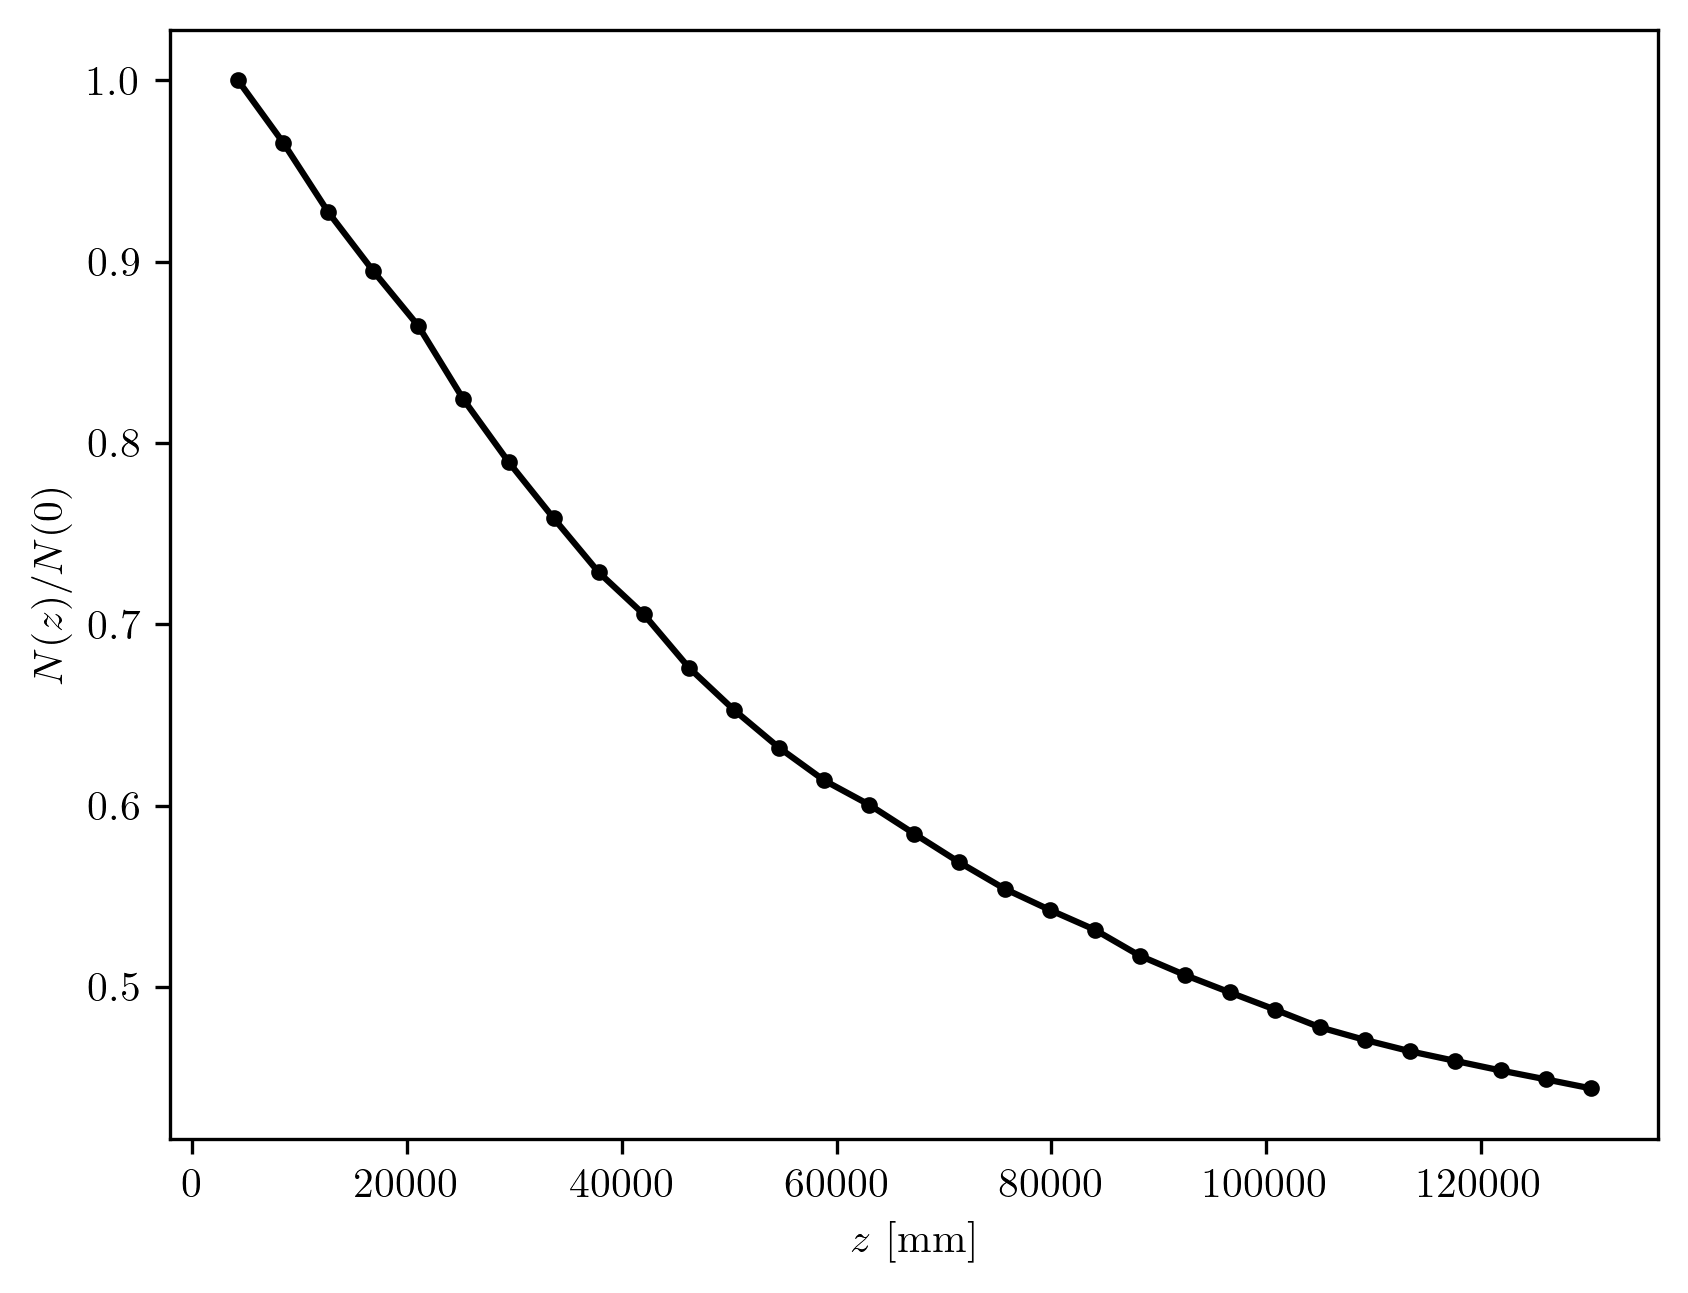

In [85]:
# Plot transmission rate vs. z:
plt.plot([i[0] for i in z_vals],[(len(i)/len(z_vals[0])) for i in z_vals],marker='.',color='black')
plt.xlabel('$z$ [mm]')
plt.ylabel('$N(z)/N(0)$')
plt.show()

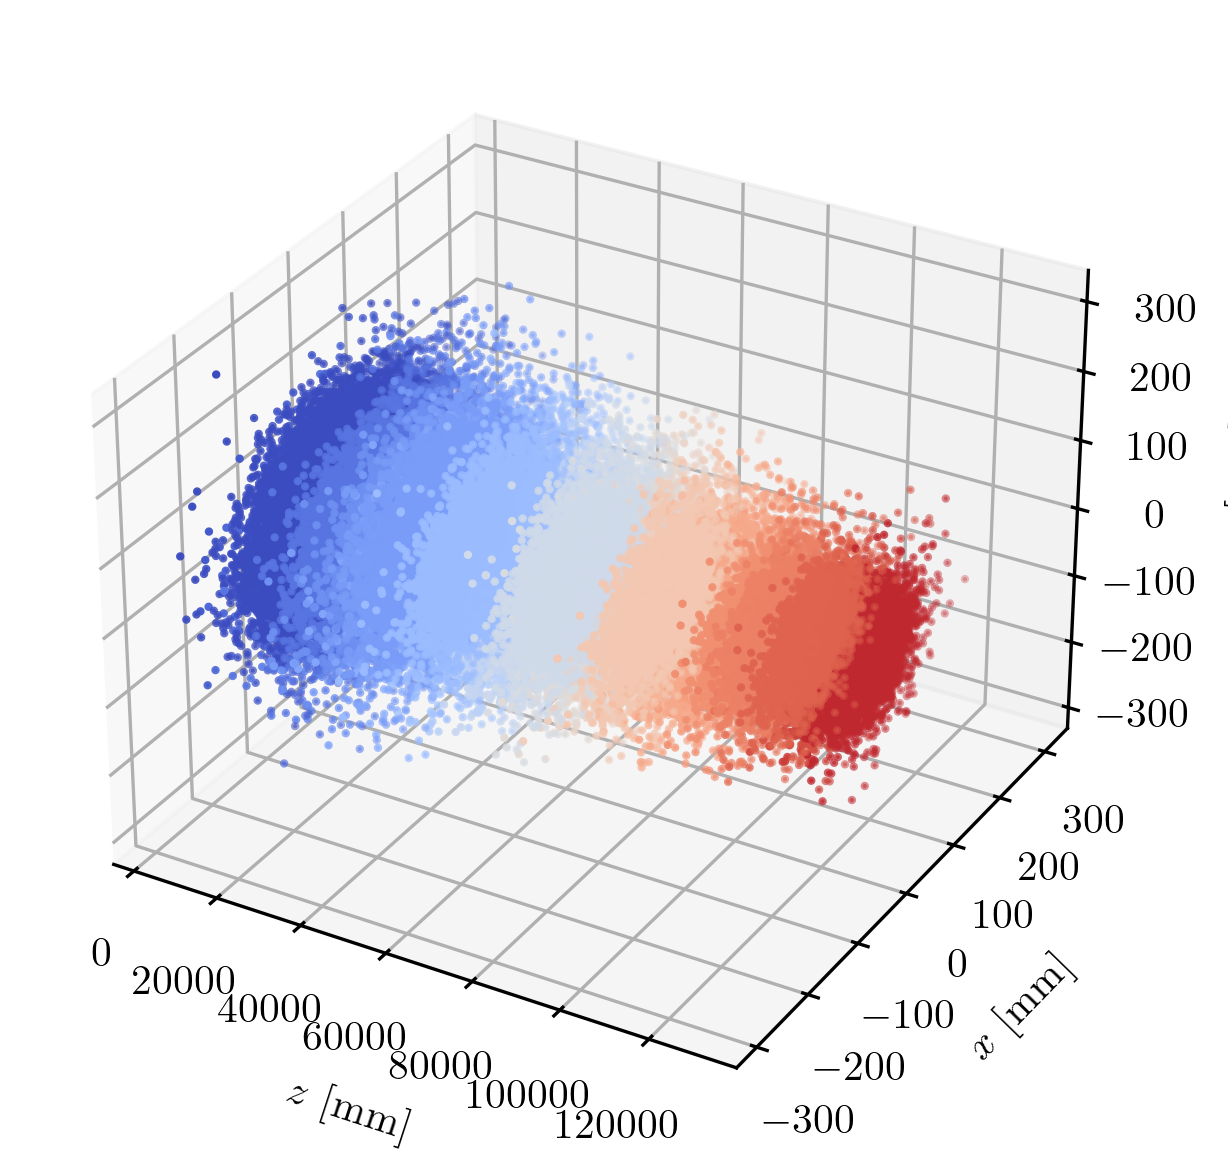

In [86]:
# 3D plot of spatial distribution at each detector:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cmap = plt.get_cmap('coolwarm')
for i in range(len(z_vals)):
    color = cmap(i/len(z_vals))
    ax.scatter(z_vals[i],x_vals[i],y_vals[i],color=color,s=1)
ax.set_xlabel('$z$ [mm]')
ax.set_ylabel('$x$ [mm]')
ax.set_zlabel('$y$ [mm]')
plt.show()

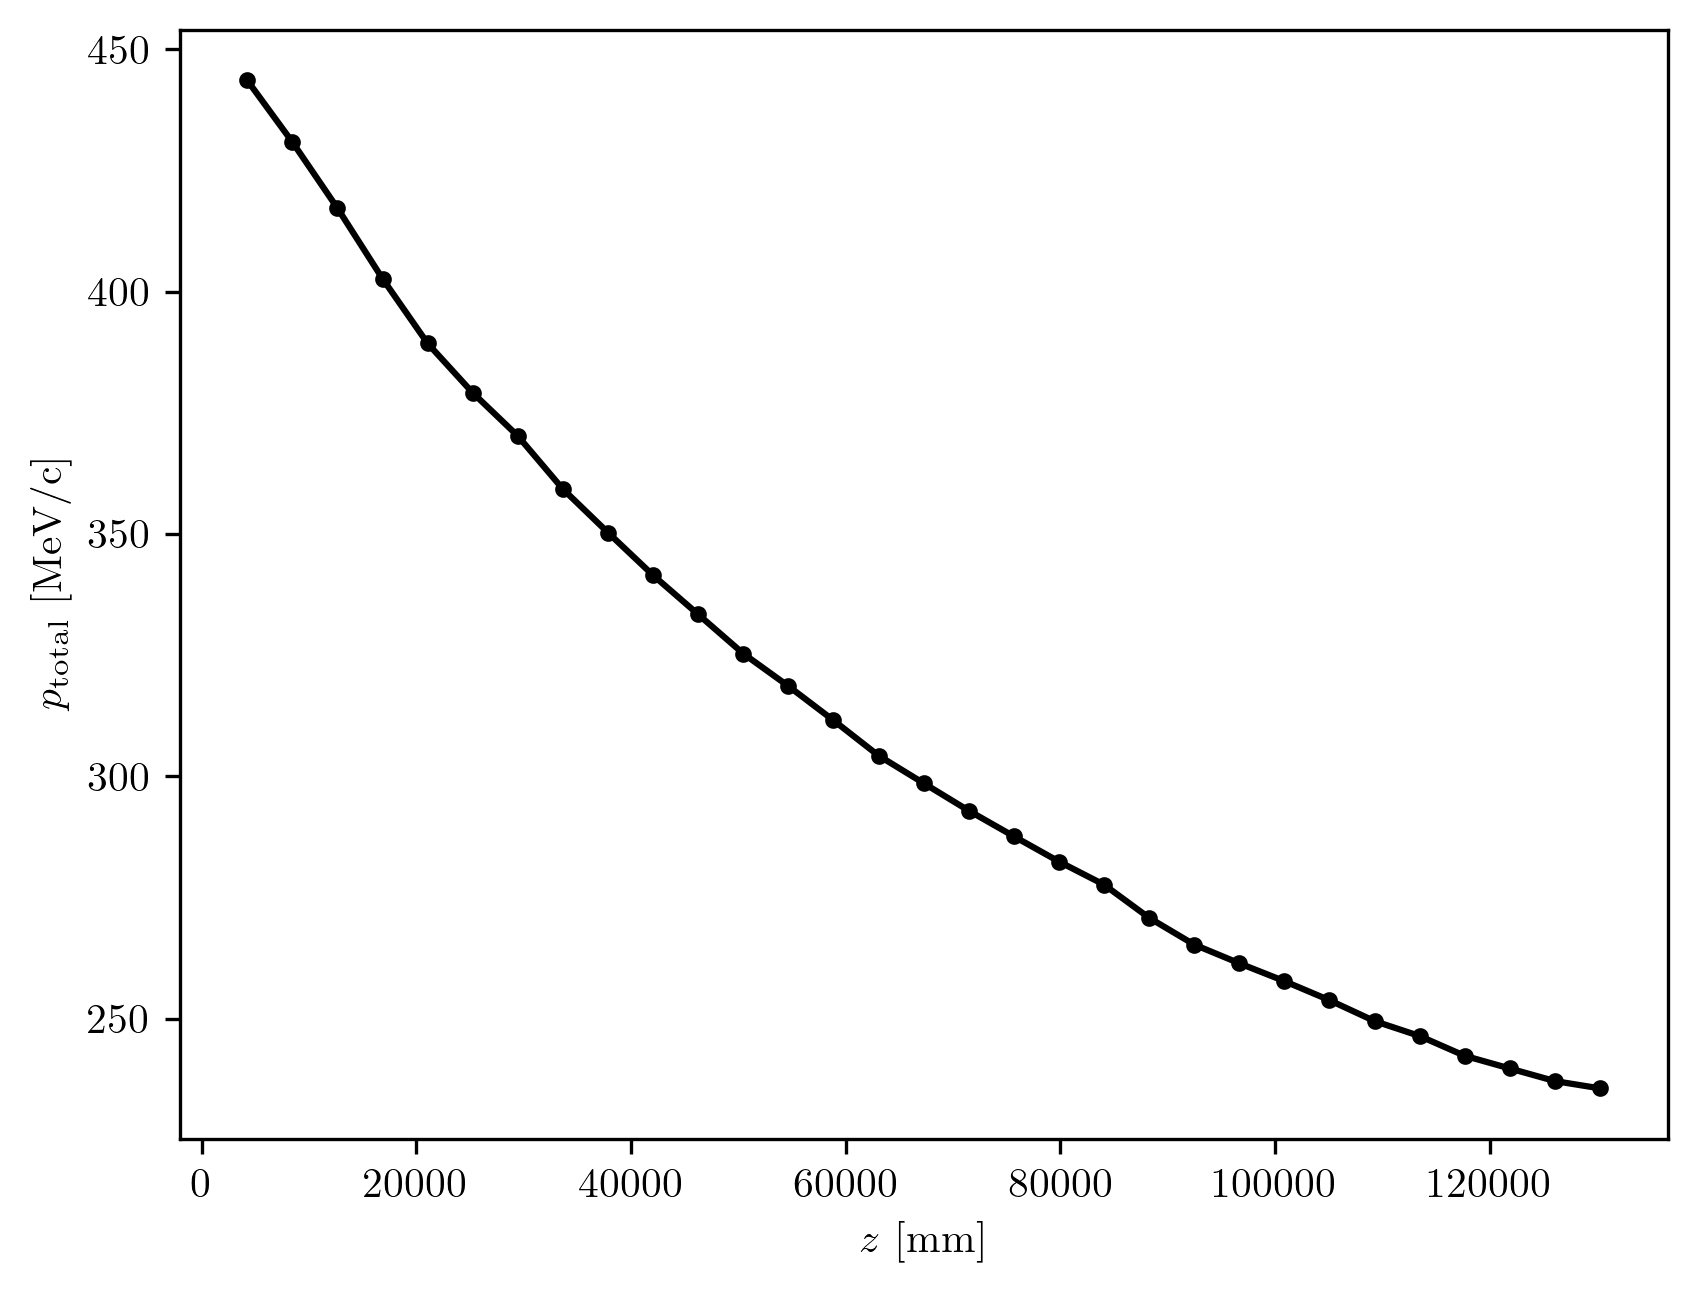

In [87]:
# Plot average total momentum along channel:
ptotal_avgs = []
for i in range(ndet):
    ptotal_avgs.append(np.average(ptotal_vals[i]))
plt.plot([i[0] for i in z_vals], ptotal_avgs, marker='.',color='black')
plt.ylabel(r'$p_{\text{total}}$ [MeV/c]')
plt.xlabel('$z$ [mm]')
plt.show()

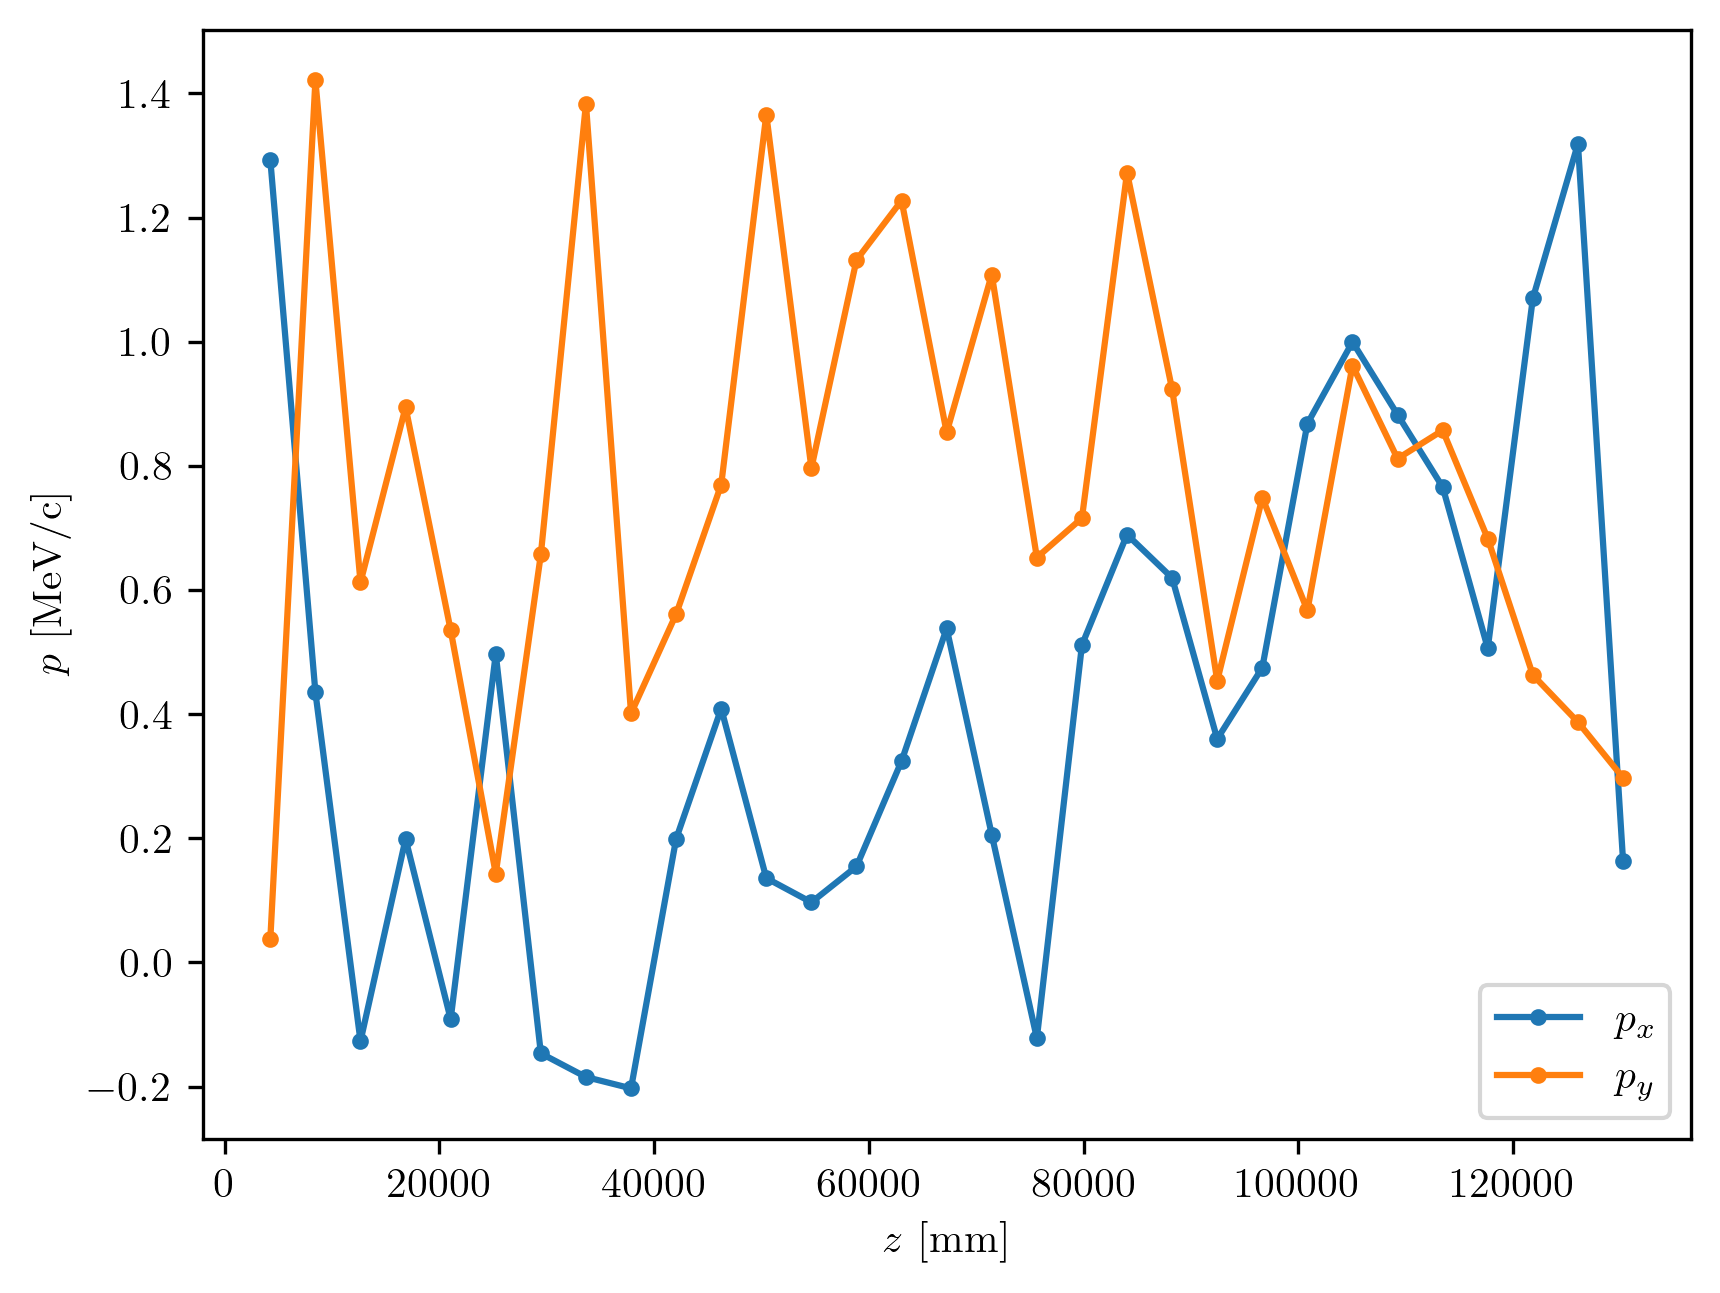

In [88]:
# Plot average p_x, p_y along channel:
px_avgs = []; py_avgs = []
for i in range(ndet):
    px_avgs.append(np.average(px_vals[i]))
    py_avgs.append(np.average(py_vals[i]))
plt.plot([i[0] for i in z_vals], px_avgs, marker='.', label='$p_x$',color='tab:blue')
plt.plot([i[0] for i in z_vals], py_avgs, marker='.', label='$p_y$',color='tab:orange')
plt.ylabel('$p$ [MeV/c]')
plt.xlabel('$z$ [mm]')
plt.legend()
plt.show()

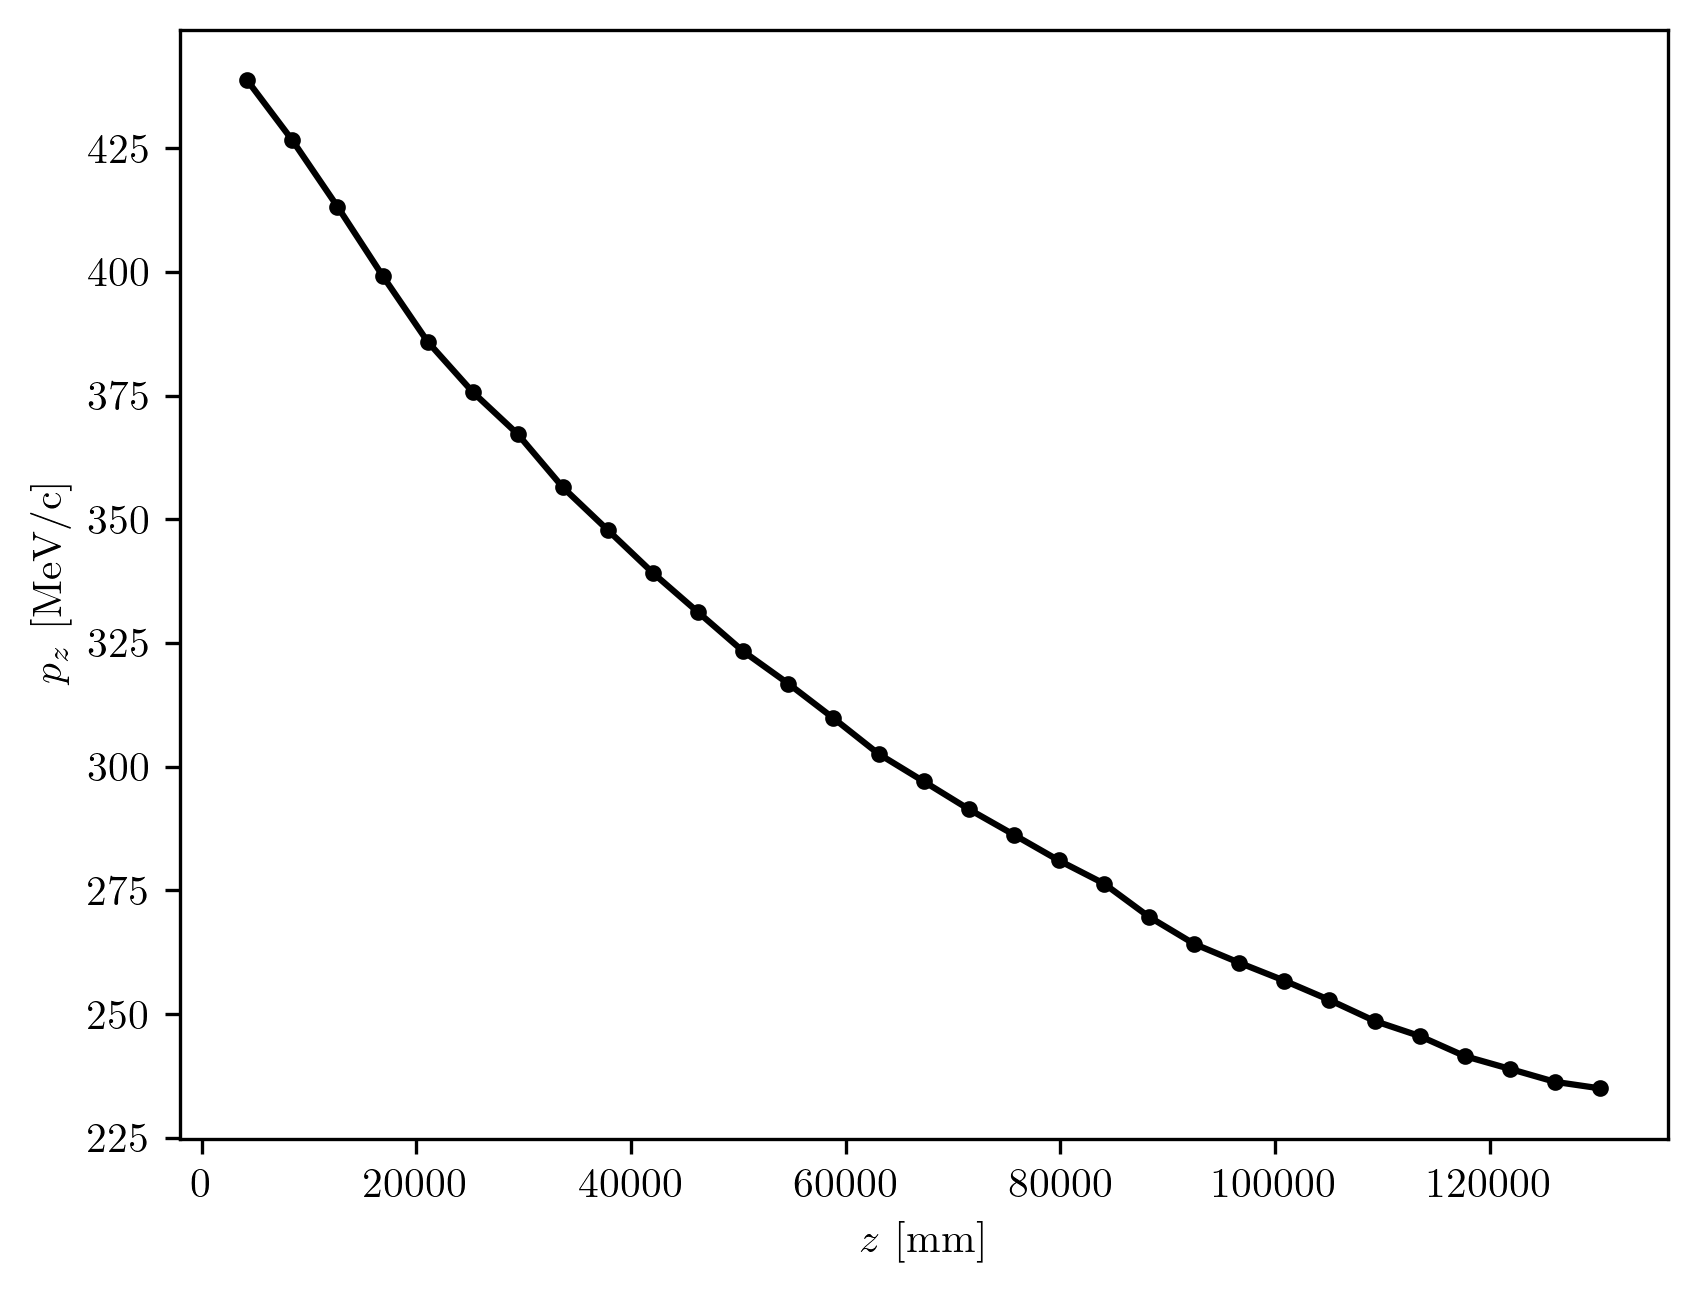

In [89]:
# Plot average p_z along channel:
pz_avgs = []
for i in range(ndet):
    pz_avgs.append(np.average(pz_vals[i]))
plt.plot([i[0] for i in z_vals], pz_avgs, marker='.',color='black')
plt.ylabel('$p_z$ [MeV/c]')
plt.xlabel('$z$ [mm]')
plt.show()

### Comparison to Yuri's paper

In [90]:
# Load transmission rate data from paper:
data = np.genfromtxt('../paper-data/paper_transmission_rate.csv',delimiter=',')
data_x = []; data_y = []
for i in range(len(data)):
    data_x.append(data[i][0])
    data_y.append(data[i][1])

# Compare final transmission rate to sim:
transmission_rate_paper = data_y[len(data_y)-1]/data_y[0]
print('Final transmission rate (paper): '+str(transmission_rate_paper))
transmission_rate_sim = len(z_vals[ndet-1])/len(z_vals[0])
print('Final transmission rate (simulation): '+str(transmission_rate_sim))

Final transmission rate (paper): 0.67750449910018
Final transmission rate (simulation): 0.4440478167026399


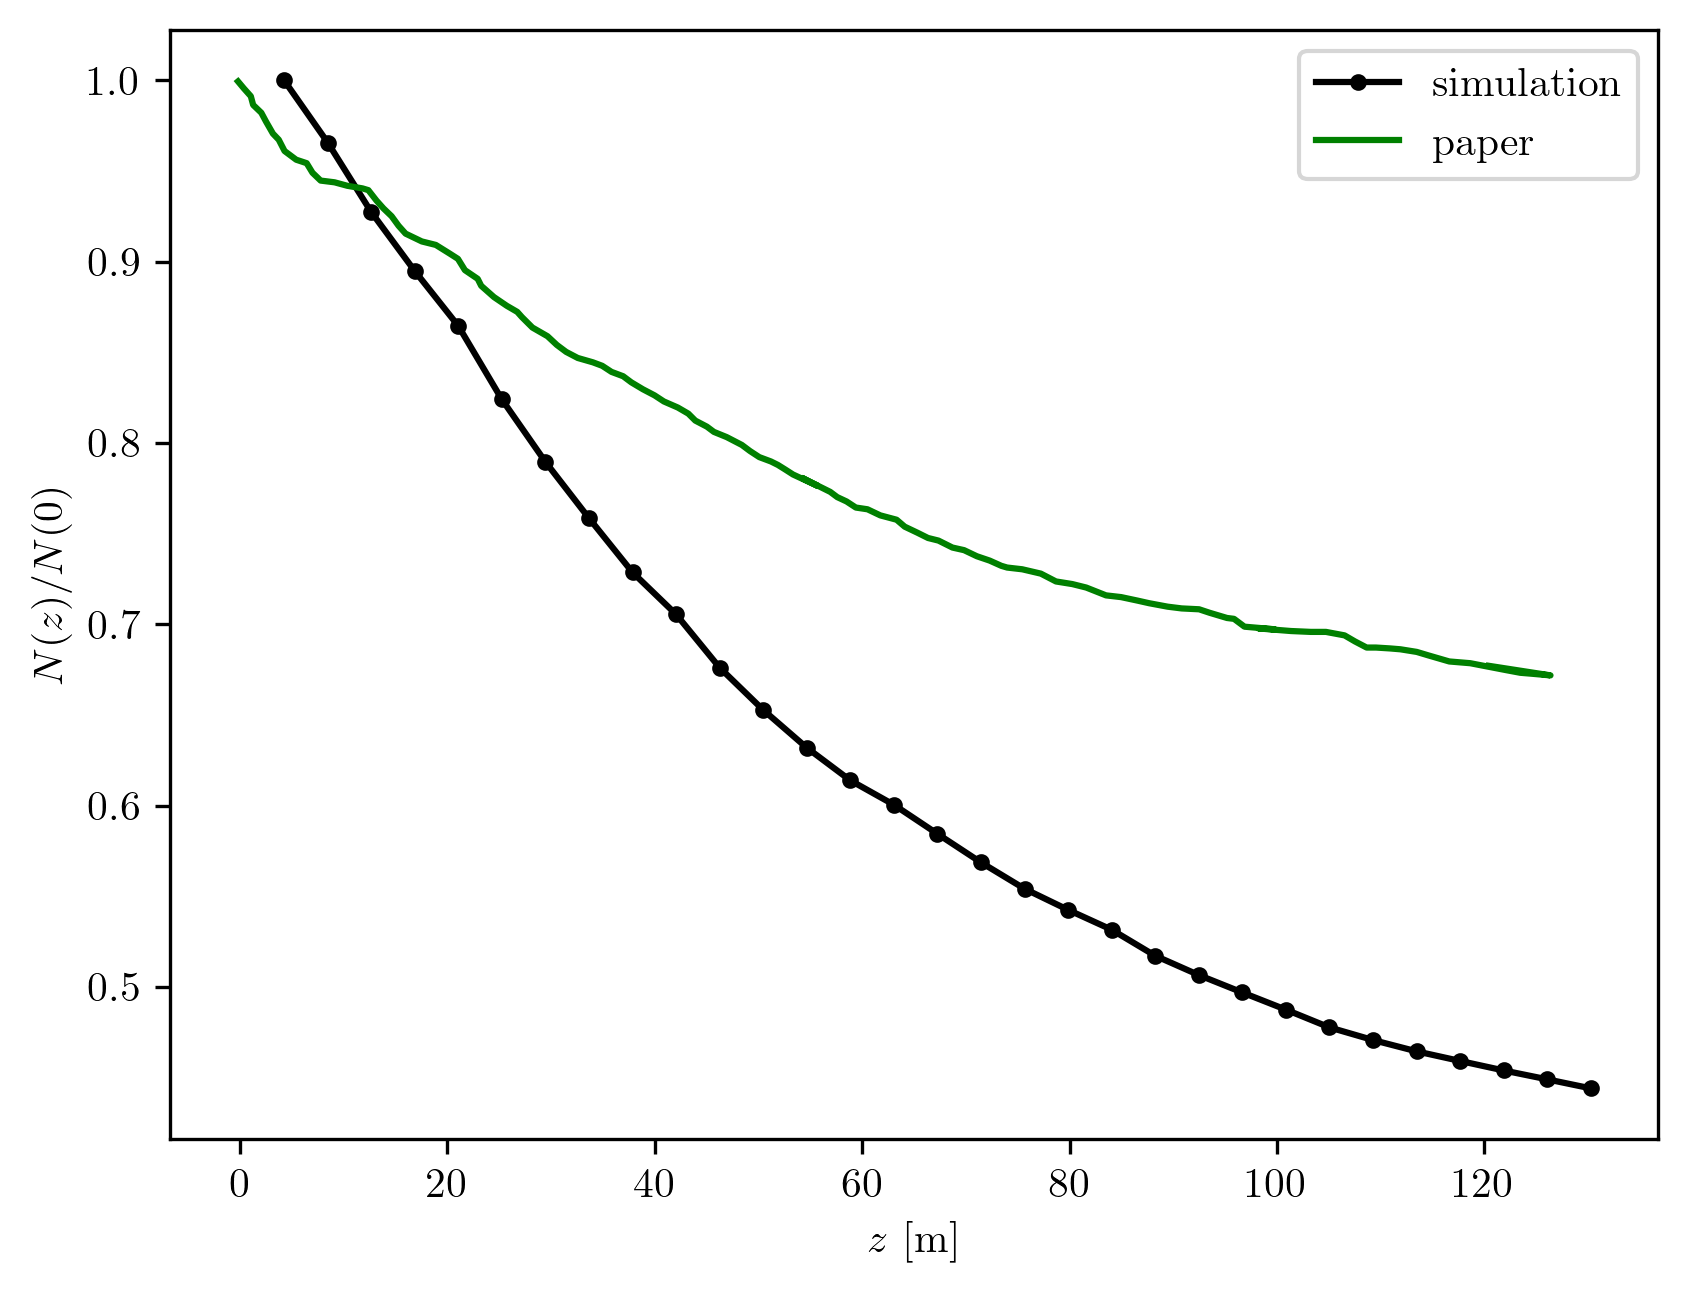

In [92]:
# Plot transmission rate vs. z for sim and paper:
plt.plot([i[0]/1000 for i in z_vals],[(len(i)/len(z_vals[0])) for i in z_vals],marker='.',color='black',label='simulation') # z: mm --> m
plt.plot(data_x,data_y,color='green',label='paper')
plt.legend()
plt.xlabel('$z$ [m]') # m to match units in paper
plt.ylabel('$N(z)/N(0)$')
plt.show()